<div class='title-page'>
    <p  class='ttlpage-heading'>Signals &amp; Systems Lab</p>
    <p class='ttlpage-heading'>ECE 351 - 51</p>
    <p class='ttlpage-instructor'>Phillip Hagen</p>
    <h1 class='ttlpage-title'>Lab #3</h1>
    <p class='rightalign'><em>Submitted by:</em></p>
    <p class='rightalign'>Mason Taylor</p>
    <p class='rightalign'>9/22/2019</p>
     
</div>

<div class="pg-header">
    <table>
        <tr>
            <td><p class="leftalign">Lab 3</p></td>
            <td><p class="rightalign">Mason Taylor</p></td>
        </tr>
    </table>
</div>

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from IPython.display import HTML

halfsize_figure = (8,3)
fullsize_figure = (16,3)

#Default figure size is smaller figure
plt.rcParams.update({'font.size': 12})

stepsize = 0.1

<h1>Introduction</h1>
<p>In this lab, we will examine convolutions and how they can be done programmatically in Python. First, we will create three model functions and graph them to test their functionality. Then, we create a function to convolve two functions and test it by convolving each of the functions with the others. We are then able to compare these results to the results obtained by convolving the functions using a library function (which we suppose to be correct).</p>

<h1>Methodology</h1>
<p>The lab will be performed in Jupyter notebook, and utilize functions from previous labs (notably, the $u(t)$ and $r(t)$ functions from lab 2). The first step will be implementing the following functions:
$$f_1(t) = u(t-2) - u(t-9)$$
$$f_2(t) = e^{-t}u(t)$$
$$f_3(t) = r(t-2)[u(t-2)-u(t-3)]+r(4-t)[u(t-3)-u(t-4)]$$</p>
<p>With these functions implemented, we will create a function to convolve the results of two functions (given as two one-dimensional arrays of values). This function will return an array of values with the result of the convolution. It can not be exact as the convolution in the this case will only be a finite sum of the products of the functions. Due to this, the step size at which the functions are evaluated will be important in determining the final accuracy of the convolution.</p>

<h1>Procedure &amp; Results</h1>
<h2>Part 1</h2>
<p><b>Goal: </b>Utilizing the unit step and ramp functions developed in Lab 2 to implement the three functions listed above.</p>
<p>The code for the 3 user defined functions is shown below.</p>

In [91]:
def r(t):
    if t > 0:
        return t
    return 0

In [92]:
def u(t):
    if t >= 0:
        return 1
    return 0

$$f_1(t) = u(t-2) - u(t-9)$$
$$f_2(t) = e^{-t}u(t)$$
$$f_3(t) = r(t-2)[u(t-2)-u(t-3)]+r(4-t)[u(t-3)-u(t-4)]$$

In [93]:
def f1(t):
    y = np.zeros((len(t), 1))
    for i in range(len(t)):
        y[i] =  u(t[i] - 2) - u(t[i] - 9)
    return y

def f2(t):
    y = np.zeros((len(t), 1))
    for i in range(len(t)):
        y[i] =  u(t[i]) * np.exp(-t[i])
    return y

def f3(t):
    y = np.zeros((len(t), 1))
    for i in range(len(t)):
        y[i] =  r(t[i] - 2)*(u(t[i] - 2) - u(t[i] - 3)) + r(4-t[i])*(u(t[i]-3) - u(t[i] - 4))
    return y                           

<p>Below, the plots of each of these functions is shown and each function looks as expected.</p>

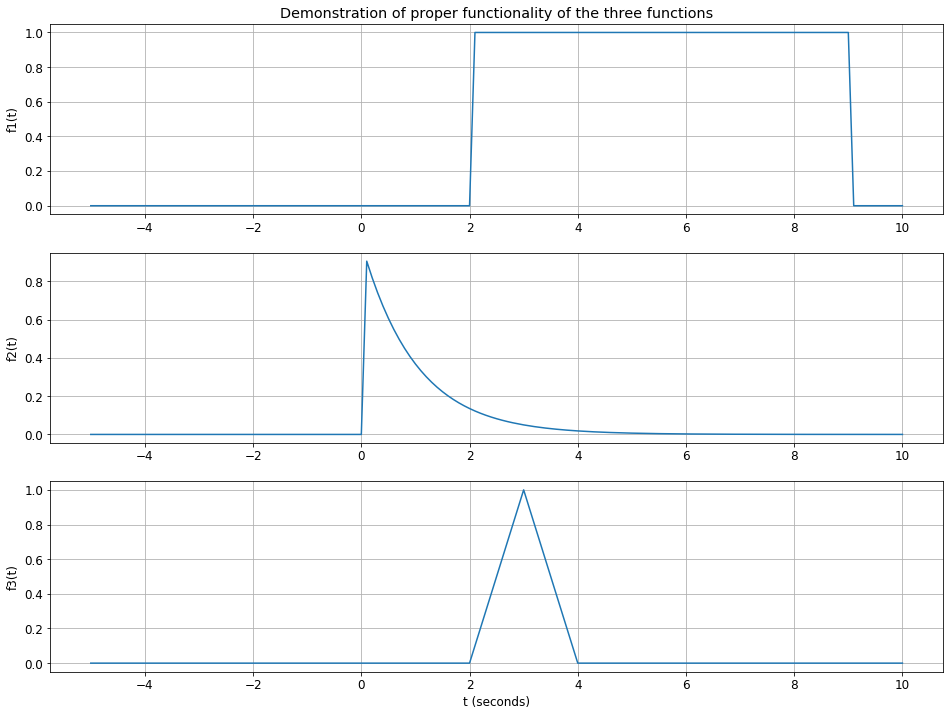

In [94]:
t = np.arange(-5, 10 + stepsize, stepsize)

y_1 = f1(t)

y_2 = f2(t)

y_3 = f3(t)

plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=-1)

plt.subplot(3,1,1)
plt.plot(t,y_1)
plt.grid(True)
plt.ylabel('f1(t)')
plt.title('Demonstration of proper functionality of the three functions')

plt.subplot(3,1,2)
plt.plot(t,y_2)
plt.grid(True)
plt.ylabel('f2(t)')
#plt.title('Demonstration of proper functionality of f2(t)')

plt.subplot(3,1,3)
plt.plot(t,y_3)
plt.grid(True)
plt.ylabel('f3(t)')
plt.xlabel('t (seconds)')
#plt.title('Demonstration of proper functionality of f3(t)')

plt.show()

<h2>Part 2</h2>
<p><b>Goal: </b> Create a custom function for convolving the results of two functions.</p>
<p>This function will perform a graphical convolution on 2 arrays of a function value.</p>
<p>To do that, imagine the first function as many delta functions with magnitudes equal to the function at every point. We then convolve each delta function with the second function, and add all the results. Using this approach, the python code implementing the function is shown below:</p>

In [95]:
#First attempt at a convolution function, the function works but is not clean due to the bounds calculations
#This function implements a convolution in the graphical method, that is, reversing the second function and
#Sliding it through the first functions domain;.
def convolve_test(f1, f2):
    y = np.zeros(((len(f1) + len(f2) - 1), 1))
    upper = 0
    lower = 0
    for i in range(len(f1)+len(f2)):
        #Compute the bounds of the inner loop
        
        #Lower bound starts at the end of the first funtion, 
        #or the current position if we have not passed the end.
        lower = (i - len(f1) + 1) if (i >= len(f2)) else 0
        
        #Upper bound goes to the current position, or the 
        #end of the second function, if the position is past.
        upper = i if (i < len(f2)) else len(f2)
        
        for j in range(lower, upper):
                y[i] += f1[i - j] * f2[j]
    return y

In [96]:
def convolve(f1, f2):
    y = np.zeros(((len(f1) + len(f2) - 1), 1))
    t_max = len(f1)
    tau_max = len(f2)
    for t in range(t_max):
        for tau in range(tau_max):
            y[t+tau] += f1[t] * f2[tau]
    return y

<p>Using this custom implementation, the results of the executing convolutions on each pair of the three functions is shown below:</p>

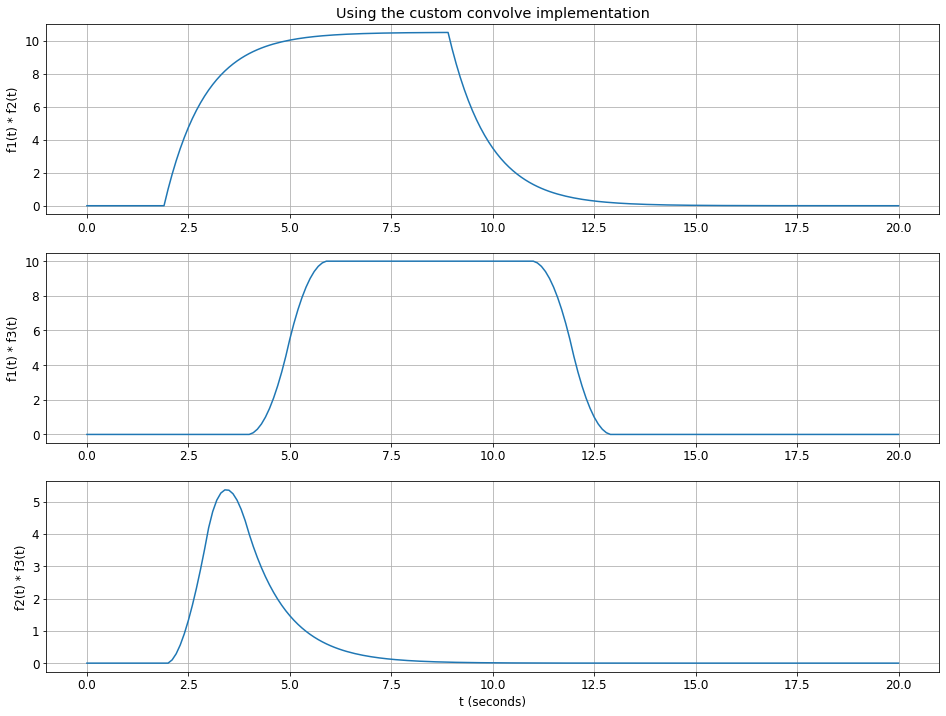

In [97]:
stepsize = 0.1
t = np.arange(0, 10 + stepsize, stepsize)

y1 = f1(t)

y2 = f2(t)

y3 = f3(t)

yc12 = convolve(y1, y2)

yc13 = convolve(y1, y3)

yc23 = convolve(y2, y3)

t = np.arange(0, 20 + stepsize, stepsize)

plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=-1)

plt.subplot(3,1,1)
plt.plot(t,yc12)
plt.grid(True)
plt.ylabel('f1(t) * f2(t)')
plt.title('Using the custom convolve implementation')

plt.subplot(3,1,2)
plt.plot(t,yc13)
plt.grid(True)
plt.ylabel('f1(t) * f3(t)')
#plt.title('')


plt.subplot(3,1,3)
plt.plot(t,yc23)
plt.grid(True)
plt.ylabel('f2(t) * f3(t)')
plt.xlabel('t (seconds)')
#plt.title('')


plt.show()

<p>We now verify the results of the custom convolution function by utilizing the built in library function scipy.signal.convolve and observing if the results are identical.</p>

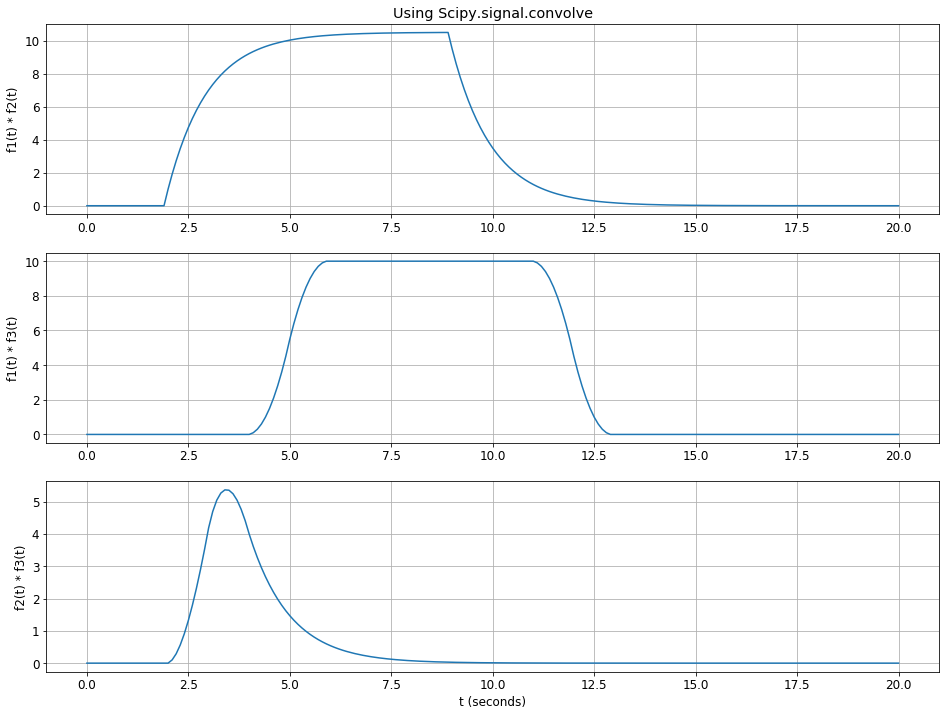

In [98]:
stepsize = 0.1
t = np.arange(0, 10 + stepsize, stepsize)

y1 = f1(t)

y2 = f2(t)

y3 = f3(t)

yc12 = sig.convolve(y1, y2)

yc13 = sig.convolve(y1, y3)

yc23 = sig.convolve(y2, y3)

t = np.arange(0, 20 + stepsize, stepsize)

plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=-1)

plt.subplot(3,1,1)
plt.plot(t,yc12)
plt.grid(True)
plt.ylabel('f1(t) * f2(t)')
plt.title('Using Scipy.signal.convolve')

plt.subplot(3,1,2)
plt.plot(t,yc13)
plt.grid(True)
plt.ylabel('f1(t) * f3(t)')
#plt.title('sing Scipy.signal.convolve')


plt.subplot(3,1,3)
plt.plot(t,yc23)
plt.grid(True)
plt.ylabel('f2(t) * f3(t)')
plt.xlabel('t (seconds)')
#plt.title(' using Scipy.signal.convolve')


plt.show()

<p>As seen above, the results of using the built in function are identical to the results using the custom function. This indicates that the custom function is correct.</p>

<h1>Issues &amp; Errors</h1>
<p>The only tricky part about figuring out the convolution function was deciding on how to algorithmically do a convolution. Obviously, it must be a discrete sum if we are not to use an integral. Thus, I initially tried using the graphical convolution style we do in class, where we reverse the first or second function and slide it through the other one. This proved to be a possible solution with good performance, but the calculation of the bounds was difficult because I did not expand the sizes of the arrays to the size of the final output. Once I saw another approach though, the more analytical approach, I liked that more due to its simplicity. I decided to use that in my final version since I can easily explain how it works and it gives just as accurate of results as my other function and the built in convolution function.</p>
<h1>Questions</h1>
<ol>
    <li><b>Did you do this lab alone or with classmates? If you collaborated to get to the solution, what did that process
        look like?</b><br><br>I did almost the entire lab myself. I completed the lab during the allocated time using my own solutions. Later, I saw a different implementation style for the convolution function and decided that was probably better since it is very readable, but also required very little modifications to my existing function.<br></li><br>
    <li><b>What was the most difficult part of this lab for you, and what did the process of figuring it out look like?</b><br><br>The most difficult part initially was figuring out the proper limits on my convolution function so that there were no out of bounds errors. I was able to figure out it by making some very quick sketches of example functions and working out mathematically where the limits of the loops should be in each case.<br></li><br>
<li><b>Did you approach writing the code with analytical or graphical convolution in mind? Why did you chose this
    approach?</b><br><br>I started with graphical convolution in mind because this is the type of convolution that I can visualize and understand most easily, which is vital when programming an alogrithm. I need to fully understand the algorithm before starting to implement it, which made graphical convolution a good choice. Also, the algorithm is essentially graphical convolution since it uses discrete steps and not infinite sums.<br></li><br>
    <li><b>Was any part of this lab not clearly explained?</b><br><br>I think the lab was fine. I had no trouble understanding the steps.<br></li><br>
</ol>
<h1>Conclusion</h1>
<p>In this lab, we have gotten a close look at convolution by creating our own convolution alogrithm. It turns out that the final algorithm looks fairly simple in python but is a very powerful algorithm capable of performing the convolution of any functions that can be represented by a finite array of finite values. We have tested the function against the results obtained by the library function scipy.signal.convolve and obtained identical results, thus verifying with reasonable certainty that the algorithm is correct.</p>